In [51]:
import numpy as np
import torch as t
from matplotlib import pyplot as plt

In [46]:
def get_positional_encodings(n_tokens, d_out, n = 10_000):
    """
    For generating the position encodings 
    
    n_tokens: is the size of sequence
    n: User defined Scalar value (default: 10000)
    d_out: Embedding layer output size
    """
    
    sequence = t.arange(n_tokens).reshape(-1, 1)
    i = t.arange(d_out).reshape(1, -1).to(t.float32)
    angles = t.divide(sequence, t.pow(n, 2 * i / d_out))
    
    angles[:, 0::2] = t.sin(angles[:, 0::2])
    angles[:, 1::2] = t.cos(angles[:, 1::2])
    
    return angles

In [81]:
n_tokens = 512
d_out = 1024
n = 10_000

In [82]:
positional_encodings = get_positional_encodings(n_tokens, d_out, n)

In [83]:
positional_encodings

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.5522e-01,  8.2186e-01,  ...,  1.0000e+00,
          1.0366e-08,  1.0000e+00],
        [ 9.0930e-01, -3.8347e-01,  9.3641e-01,  ...,  1.0000e+00,
          2.0733e-08,  1.0000e+00],
        ...,
        [ 6.1950e-02, -9.1622e-01,  7.9822e-01,  ...,  1.0000e+00,
          5.2765e-06,  1.0000e+00],
        [ 8.7333e-01, -1.7546e-01,  9.4980e-01,  ...,  1.0000e+00,
          5.2868e-06,  1.0000e+00],
        [ 8.8177e-01,  7.2139e-01,  2.8398e-01,  ...,  1.0000e+00,
          5.2972e-06,  1.0000e+00]])

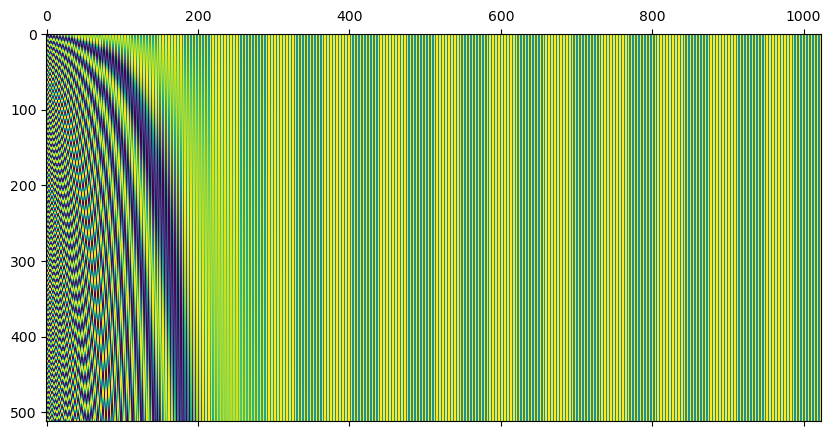

In [80]:
plt.figure(figsize = (10, 10))
plt.matshow(positional_encodings, fignum=1)

# Positional Encoding Layer using PyTorch

In [136]:
class PositionEncodingLayer(t.nn.Module):
    
    def __init__(self, emb_in, embedding_size, n=10000):
        super().__init__()
        self.embedding = t.nn.Embedding(emb_in, embedding_size)
        self.embedding_size = embedding_size
        self.scaler_n = n
    
    def __position_encoder__(self, token_size):  
        sequence = t.arange(token_size).reshape(-1, 1)
        i = t.arange(self.embedding_size).reshape(1, -1).to(t.float32)
        angles = t.divide(sequence, t.pow(n, 2 * i / self.embedding_size))

        angles[:, 0::2] = t.sin(angles[:, 0::2])
        angles[:, 1::2] = t.cos(angles[:, 1::2])
        
        return angles
    
    def forward(self, tokens: t.Tensor):
        
        emds = self.embedding(tokens)
        positions = self.__position_encoder__(tokens.shape[0])
        return emds + positions, positions, emds

In [137]:
pe_layer = PositionEncodingLayer(512, 1024)

In [138]:
encoded_tensors, positions, emds = pe_layer(t.randint(0, 512, (100,)))

encoded_tensors = encoded_tensors.detach().numpy()
positions = positions.detach().numpy()
emds = emds.detach().numpy()

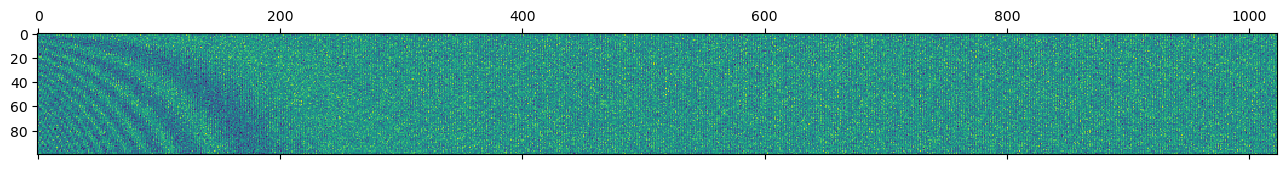

In [139]:
plt.matshow(encoded_tensors)

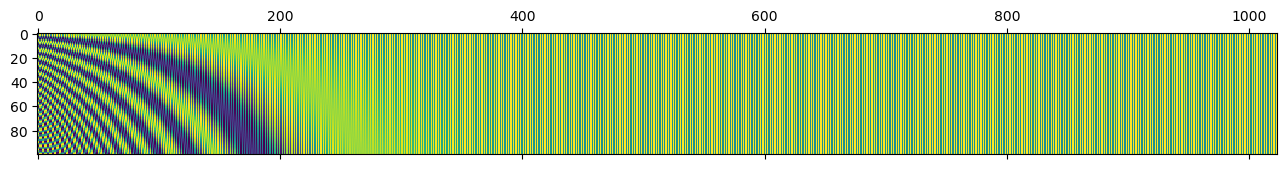

In [140]:
plt.matshow(positions)

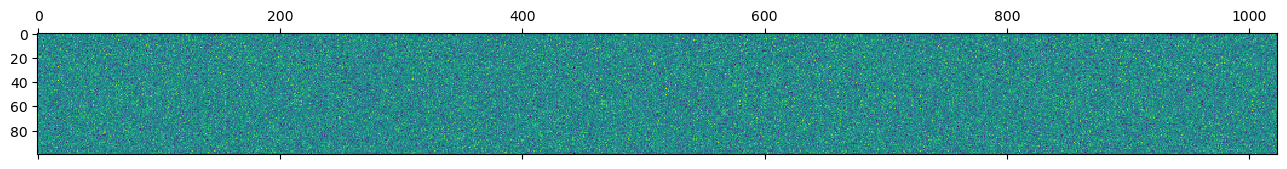

In [141]:
plt.matshow(emds)